# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from Dataframes import sociedades_df, contratos_df, pagos_df, requisitos_df, ofertas_df, sociedades_con_contrato_df

g:\proyecto\Proyecto-Data-Science\Dataframes.py:31: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  pagos_df = pd.read_csv(os.path.join('data', 'pagos.csv'))


Tratare de decifrar si existe alguna relacion entre los factores de los contratos y el retraso

In [2]:
posibles_factores = ['REGIONGEOGRAFICA', 'SERVICIO', 'TIPOGASTO', 'ESTADO', 'FECHAINICIO',
                     'FECHATERMINO', 'FECHATERMINOORIGINAL','MODALIDADLICITACION',
                     'MODALIDADCONTRATACION', 'TIPOREAJUSTE', 'AVANCEFINANCIERO', 'MANDANTE']

In [3]:
contratos_df.dtypes

REGIONGEOGRAFICA               category
CODIGOCONTRATO                    int64
CODIGOBIP                        object
NOMBRECONTRATO                   object
SERVICIO                       category
CENTROGESTION                    object
TIPOGASTO                      category
ESTADO                         category
FECHAINICIO              datetime64[ns]
FECHATERMINO             datetime64[ns]
FECHATERMINOORIGINAL     datetime64[ns]
MONTOINICIAL                      int64
MONTOVIGENTE                      int64
IDCHILECOMPRA                    object
RUTADJUDICADO                     int64
NOMBREADJUDICADO                 object
MODALIDADLICITACION            category
MODALIDADCONTRATACION          category
TIPOREAJUSTE                   category
TIPO_PERFIL                    category
AVANCEFINANCIERO                float64
MANDANTE                       category
MERGERUT                         object
dtype: object

In [4]:
contratos_descubrir_atraso = contratos_df[posibles_factores]
contratos_descubrir_atraso= contratos_descubrir_atraso.dropna()
contratos_descubrir_atraso= contratos_descubrir_atraso.drop_duplicates()
contratos_descubrir_atraso['DIRFERENCIAFECHATERMINO'] = contratos_descubrir_atraso['FECHATERMINO'] - contratos_descubrir_atraso['FECHATERMINOORIGINAL']
contratos_descubrir_atraso.head()

,REGIONGEOGRAFICA,SERVICIO,TIPOGASTO,ESTADO,FECHAINICIO,FECHATERMINO,FECHATERMINOORIGINAL,MODALIDADLICITACION,MODALIDADCONTRATACION,TIPOREAJUSTE,AVANCEFINANCIERO,MANDANTE,DIRFERENCIAFECHATERMINO
0,Tarapacá,ARQUITECTURA,Obra,En Ejecución,2013-07-17,2013-07-27,2013-07-27,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,0.0,Externos,0 days
1,Atacama,ARQUITECTURA,Obra,Terminado,2010-04-15,2010-04-30,2010-04-30,Propuesta privada,PRECIOS UNITARIOS,Sin Reajuste,0.0,Externos,0 days
2,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2015-12-03,2015-12-23,2015-12-23,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.0,Internos,0 days
3,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-10-10,2013-12-29,2013-12-29,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.0,Internos,0 days
4,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-05-31,2013-12-21,2013-11-27,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.0,Internos,24 days


In [5]:
contratos_descubrir_atraso['DIRFERENCIAFECHATERMINO'] = contratos_descubrir_atraso['DIRFERENCIAFECHATERMINO'].dt.days

In [6]:
analisando_factores_categoricos = ['SERVICIO', 'TIPOGASTO','MODALIDADLICITACION',
                                   'MODALIDADCONTRATACION', 'TIPOREAJUSTE', 'MANDANTE']

dummys_contratos = pd.get_dummies(contratos_descubrir_atraso[analisando_factores_categoricos]).astype('int16')
dummys_contratos

,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,SERVICIO_I. N. HIDRAULICA,SERVICIO_O.PORTUARIAS,SERVICIO_OBRAS HIDRÁULICAS,SERVICIO_SSSR,SERVICIO_VIALIDAD,TIPOGASTO_Asesorías y Consultorías,TIPOGASTO_Estudio,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
18246,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18247,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
18248,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [7]:
columnas_contratos_atraso = list(set(posibles_factores) - set(analisando_factores_categoricos)) + ['DIRFERENCIAFECHATERMINO']
columnas_contratos_atraso

['AVANCEFINANCIERO',
 'FECHAINICIO',
 'REGIONGEOGRAFICA',
 'FECHATERMINOORIGINAL',
 'FECHATERMINO',
 'ESTADO',
 'DIRFERENCIAFECHATERMINO']

In [8]:
contratos_atraso_df = pd.concat([contratos_descubrir_atraso[columnas_contratos_atraso], dummys_contratos], axis=1)
contratos_atraso_df.head()

,AVANCEFINANCIERO,FECHAINICIO,REGIONGEOGRAFICA,FECHATERMINOORIGINAL,FECHATERMINO,ESTADO,DIRFERENCIAFECHATERMINO,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,0.0,2013-07-17,Tarapacá,2013-07-27,2013-07-27,En Ejecución,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,0.0,2010-04-15,Atacama,2010-04-30,2010-04-30,Terminado,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,1.0,2015-12-03,Aysén,2015-12-23,2015-12-23,Terminado,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,1.0,2013-10-10,Aysén,2013-12-29,2013-12-29,Terminado,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,1.0,2013-05-31,Aysén,2013-11-27,2013-12-21,Terminado,24,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [9]:
contratos_atraso_df[contratos_atraso_df['DIRFERENCIAFECHATERMINO'] == 0]

,AVANCEFINANCIERO,FECHAINICIO,REGIONGEOGRAFICA,FECHATERMINOORIGINAL,FECHATERMINO,ESTADO,DIRFERENCIAFECHATERMINO,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,0.000000,2013-07-17,Tarapacá,2013-07-27,2013-07-27,En Ejecución,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,0.000000,2010-04-15,Atacama,2010-04-30,2010-04-30,Terminado,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,1.000000,2015-12-03,Aysén,2015-12-23,2015-12-23,Terminado,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,1.000000,2013-10-10,Aysén,2013-12-29,2013-12-29,Terminado,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5,1.000000,2010-09-14,Aysén,2010-12-23,2010-12-23,Terminado,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,0.999996,2024-05-16,Metropolitana de Santiago,2024-05-21,2024-05-21,En Ejecución,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
18246,1.000000,2024-05-28,Los Ríos,2024-06-28,2024-06-28,En Ejecución,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18247,1.000000,2024-05-16,Aysén,2024-05-26,2024-05-26,Terminado,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
18248,0.000000,2024-06-24,Biobío,2024-07-01,2024-07-01,En Ejecución,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [10]:
contratos_atraso_df[contratos_atraso_df.columns[7:]]

,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,SERVICIO_I. N. HIDRAULICA,SERVICIO_O.PORTUARIAS,SERVICIO_OBRAS HIDRÁULICAS,SERVICIO_SSSR,SERVICIO_VIALIDAD,TIPOGASTO_Asesorías y Consultorías,TIPOGASTO_Estudio,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
18246,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18247,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
18248,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(contratos_atraso_df[contratos_atraso_df.columns[7:]], 
                                                    contratos_atraso_df['DIRFERENCIAFECHATERMINO'],test_size=0.2, random_state=42)

In [12]:
escalar = StandardScaler()
escalar = escalar.fit(X_train)
X_test= escalar.transform(X_test)
X_train= escalar.transform(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

predictor_multi_lineal = LinearRegression()
predictor_multi_lineal.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predichos = predictor_multi_lineal.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_predichos, y_test)

-19.644761721479835

In [16]:
contratos_descubrir_atraso

,REGIONGEOGRAFICA,SERVICIO,TIPOGASTO,ESTADO,FECHAINICIO,FECHATERMINO,FECHATERMINOORIGINAL,MODALIDADLICITACION,MODALIDADCONTRATACION,TIPOREAJUSTE,AVANCEFINANCIERO,MANDANTE,DIRFERENCIAFECHATERMINO
0,Tarapacá,ARQUITECTURA,Obra,En Ejecución,2013-07-17,2013-07-27,2013-07-27,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,0.000000,Externos,0
1,Atacama,ARQUITECTURA,Obra,Terminado,2010-04-15,2010-04-30,2010-04-30,Propuesta privada,PRECIOS UNITARIOS,Sin Reajuste,0.000000,Externos,0
2,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2015-12-03,2015-12-23,2015-12-23,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.000000,Internos,0
3,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-10-10,2013-12-29,2013-12-29,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.000000,Internos,0
4,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-05-31,2013-12-21,2013-11-27,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.000000,Internos,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,Metropolitana de Santiago,ARQUITECTURA,Asesorías y Consultorías,En Ejecución,2024-05-16,2024-05-21,2024-05-21,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,0.999996,Internos,0
18246,Los Ríos,O.PORTUARIAS,Obra,En Ejecución,2024-05-28,2024-06-28,2024-06-28,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,1.000000,Internos,0
18247,Aysén,O.PORTUARIAS,Obra,Terminado,2024-05-16,2024-05-26,2024-05-26,Trato directo,PAGO CONTRA RECEPCION,Sin Reajuste,1.000000,Internos,0
18248,Biobío,VIALIDAD,Obra,En Ejecución,2024-06-24,2024-07-01,2024-07-01,Trato directo,PAGO CONTRA RECEPCION,Indice de Precios al Consumidor,0.000000,Internos,0


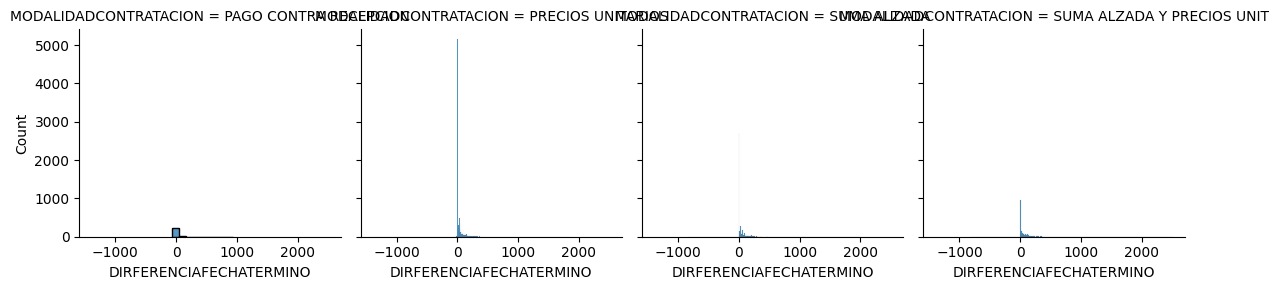

In [17]:
grafico = sns.FacetGrid(data=contratos_descubrir_atraso, col='MODALIDADCONTRATACION', margin_titles=True)
grafico.map(sns.histplot, 'DIRFERENCIAFECHATERMINO')

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from Dataframes import sociedades_df, contratos_df, pagos_df, requisitos_df, ofertas_df, sociedades_con_contrato_df
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # Establecemos el estilo de Seaborn
plt.rcParams['figure.figsize'] = [10, 6]  # Tamaño por defecto de las figuras

In [41]:
# Lista de factores que queremos analizar
factores_a_analizar = ['REGIONGEOGRAFICA', 'SERVICIO', 'TIPOGASTO', 'ESTADO', 'FECHAINICIO',
                     'FECHATERMINO', 'FECHATERMINOORIGINAL','MODALIDADLICITACION',
                     'MODALIDADCONTRATACION', 'TIPOREAJUSTE', 'AVANCEFINANCIERO', 'MANDANTE'] 

In [42]:
# Seleccionamos y limpiamos datos
datos_contratos = contratos_df[factores_a_analizar].copy()
datos_contratos = datos_contratos.dropna()
datos_contratos = datos_contratos.drop_duplicates()

# Calculamos el retraso
datos_contratos['RETRASO_DIAS'] = datos_contratos['FECHATERMINO'] - datos_contratos['FECHATERMINOORIGINAL']
datos_contratos['RETRASO_DIAS'] = datos_contratos['RETRASO_DIAS'].dt.days

# Variables categóricas
variables_categoricas = ['SERVICIO', 'TIPOGASTO','MODALIDADLICITACION',
                        'MODALIDADCONTRATACION', 'TIPOREAJUSTE', 'MANDANTE']

# Convertimos a variables dummy
variables_numericas = pd.get_dummies(datos_contratos[variables_categoricas]).astype('int16')

# Seleccionamos columnas no categóricas
otras_columnas = list(set(factores_a_analizar) - set(variables_categoricas)) + ['RETRASO_DIAS']

# Juntamos todos los datos
datos_finales = pd.concat([datos_contratos[otras_columnas], variables_numericas], axis=1)

In [43]:
# Importamos herramientas de sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\yares\AppData\Local\Temp\ipykernel_17040\4079849449.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_variables.head(10),


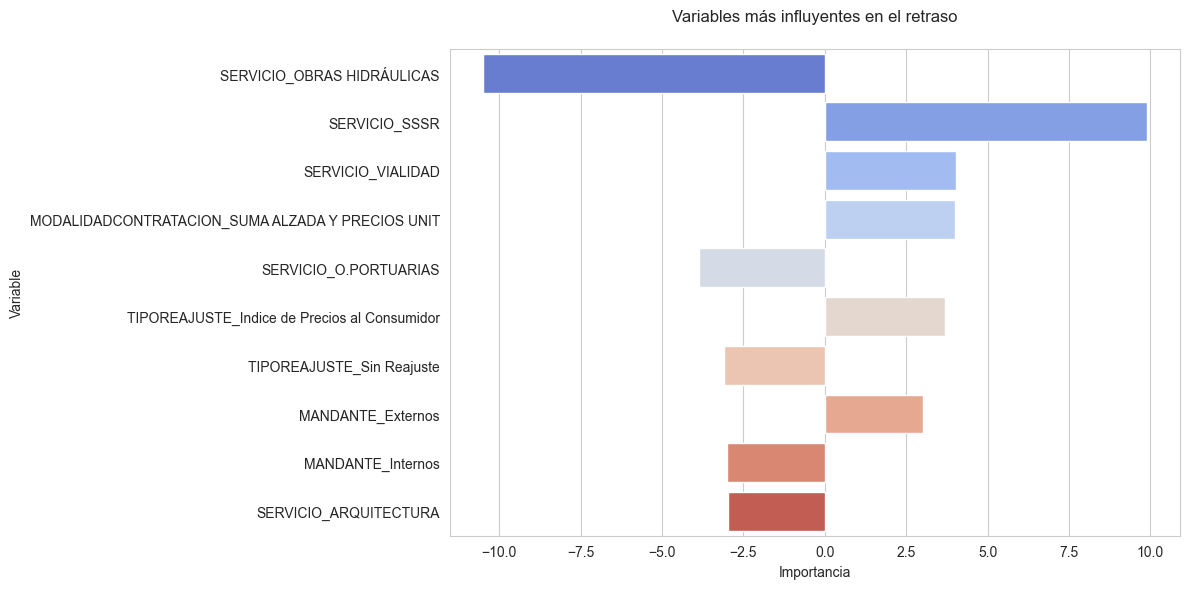

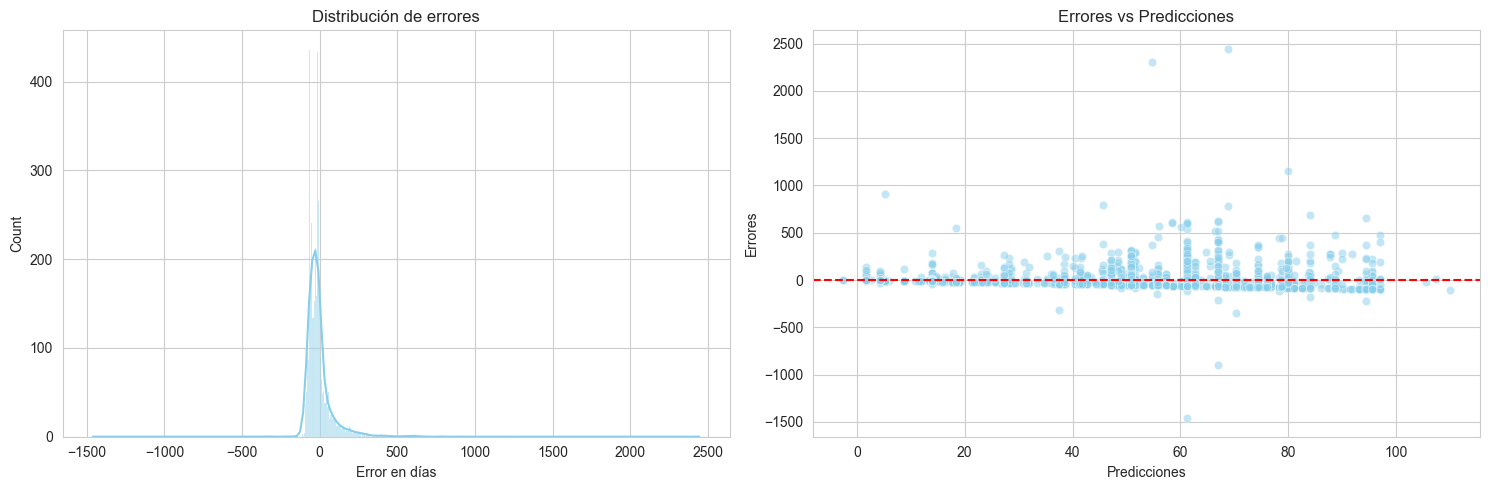

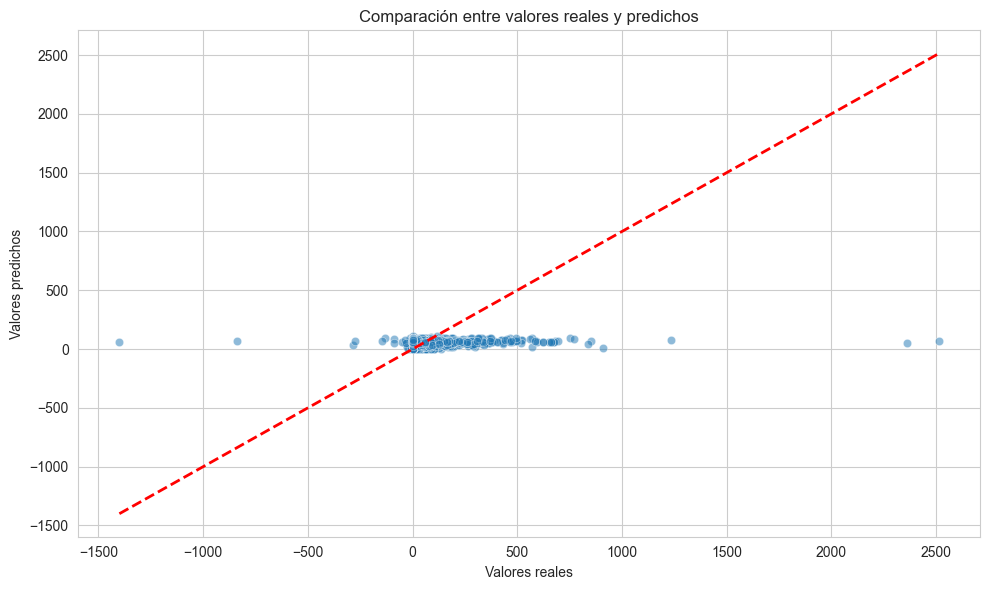

C:\Users\yares\AppData\Local\Temp\ipykernel_17040\4079849449.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_contratos,


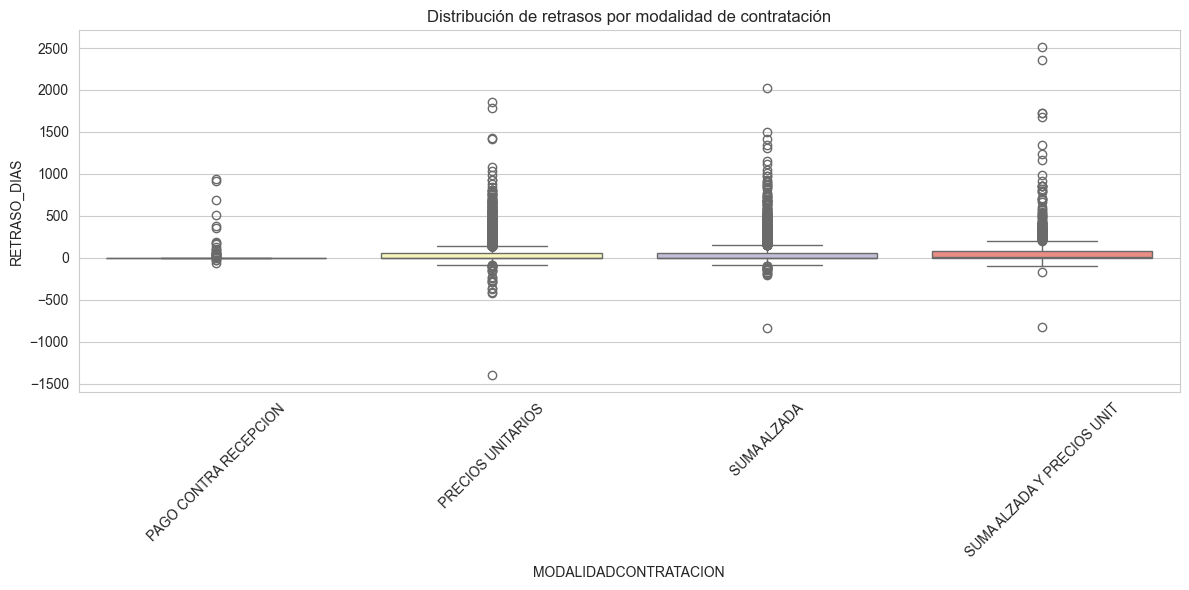


Resultados del modelo:
Mejor alpha encontrado: 100.0
R² del modelo: 0.0346
Error cuadrático medio: 11966.0715
Raíz del error cuadrático medio: 109.3895

Resultados de validación cruzada:
Media R²: 0.0430 (+/- 0.0115)


In [44]:
# Preparamos datos para el modelo
X = datos_finales[datos_finales.columns[7:]]
y = datos_finales['RETRASO_DIAS']

# División de datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos datos
escalador = StandardScaler()
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

# Búsqueda de mejores parámetros
valores_alpha = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

modelo_ridge = Ridge()
busqueda_parametros = GridSearchCV(modelo_ridge, valores_alpha, cv=5, scoring='r2', n_jobs=-1)
busqueda_parametros.fit(X_entrenamiento_escalado, y_entrenamiento)

# Entrenamos modelo final
mejor_modelo = Ridge(alpha=busqueda_parametros.best_params_['alpha'])
mejor_modelo.fit(X_entrenamiento_escalado, y_entrenamiento)

# Hacemos predicciones
predicciones = mejor_modelo.predict(X_prueba_escalado)

# Visualizaciones con Seaborn

# 1. Importancia de variables
importancia_variables = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': mejor_modelo.coef_
})
importancia_variables = importancia_variables.sort_values('Importancia', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importancia_variables.head(10), 
            x='Importancia', 
            y='Variable',
            palette='coolwarm')
plt.title('Variables más influyentes en el retraso', pad=20)
plt.tight_layout()
plt.show()

# 2. Distribución de errores
errores = y_prueba - predicciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de errores
sns.histplot(data=errores, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribución de errores')
ax1.set_xlabel('Error en días')

# Errores vs Predicciones
sns.scatterplot(x=predicciones, y=errores, ax=ax2, alpha=0.5, color='skyblue')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Errores vs Predicciones')
ax2.set_xlabel('Predicciones')
ax2.set_ylabel('Errores')

plt.tight_layout()
plt.show()

# 3. Valores reales vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_prueba, y=predicciones, alpha=0.5)
plt.plot([y_prueba.min(), y_prueba.max()], 
         [y_prueba.min(), y_prueba.max()], 
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')
plt.tight_layout()
plt.show()

# 4. Box plot de retrasos por modalidad de contratación
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_contratos, 
           x='MODALIDADCONTRATACION', 
           y='RETRASO_DIAS',
           palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribución de retrasos por modalidad de contratación')
plt.tight_layout()
plt.show()

# Imprimimos métricas
print("\nResultados del modelo:")
print(f"Mejor alpha encontrado: {busqueda_parametros.best_params_['alpha']}")
print(f"R² del modelo: {r2_score(y_prueba, predicciones):.4f}")
print(f"Error cuadrático medio: {mean_squared_error(y_prueba, predicciones):.4f}")
print(f"Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(y_prueba, predicciones)):.4f}")

# Validación cruzada
puntuaciones = cross_val_score(mejor_modelo, X_entrenamiento_escalado, y_entrenamiento, cv=5, scoring='r2')
print("\nResultados de validación cruzada:")
print(f"Media R²: {puntuaciones.mean():.4f} (+/- {puntuaciones.std() * 2:.4f})")